In [1]:
# Célula 1

# Instala a biblioteca ultralytics que contém o YOLOv8
!pip install ultralytics

# Apenas importar a biblioteca já é suficiente para usá-la.
import ultralytics
print(f"Biblioteca Ultralytics versão {ultralytics.__version__} instalada com sucesso!")

Biblioteca Ultralytics versão 8.3.181 instalada com sucesso!


In [3]:
import yaml
from ultralytics import YOLO

# --- PASSO 1: CRIAR O ARQUIVO 'coco128.yaml' ---
# EXPLICAÇÃO: O PORQUÊ DO ARQUIVO YAML
# O framework YOLOv8 não lê as pastas de imagens diretamente. Ele precisa de um
# arquivo de configuração, no formato YAML, para entender a estrutura do nosso dataset.
# Este arquivo atua como um "mapa", informando ao script de treinamento:
#
# 1. 'path': O diretório raiz onde as imagens estão.
# 2. 'train', 'val': As subpastas específicas para treino e validação.
# 3. 'nc': O número total de classes que o modelo deve aprender (neste caso, 80).
# 4. 'names': A lista com o nome exato de cada classe, que corresponde ao índice
#    nos arquivos de anotação (ex: a classe 'person' tem o índice 0).
#
# Criamos este arquivo aqui porque o dataset do Kaggle não o fornecia.

# Define o conteúdo do nosso arquivo de configuração
# Apontamos para as pastas de imagens que já existem no seu dataset do Kaggle
yaml_content = {
    'path': '/kaggle/input/coco128-data-for-yolov8/datasets',
    'train': 'train',
    'val': 'valid',
    'test': 'test',
    'nc': 80,
    'names': ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 
              'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 
              'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 
              'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 
              'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 
              'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 
              'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 
              'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 
              'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 
              'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
}

# Caminho onde vamos salvar nosso novo arquivo .yaml (na pasta de trabalho do Kaggle)
yaml_file_path = '/kaggle/working/coco128.yaml'

# Escreve o dicionário no arquivo .yaml
with open(yaml_file_path, 'w') as f:
    yaml.dump(yaml_content, f, sort_keys=False)

print(f"Arquivo '{yaml_file_path}' criado com sucesso!")

# --- PASSO 2: INICIAR O TREINAMENTO USANDO O NOVO ARQUIVO ---

# Carrega o modelo pré-treinado
model = YOLO('yolov8n.pt')

# Treina o modelo, agora usando o caminho para o arquivo .yaml que acabamos de criar
results = model.train(
   data=yaml_file_path,  # <-- Usando o caminho do nosso novo arquivo
   epochs=25,
   imgsz=640,
   project='YOLOv8-Kaggle-Project',
   name='treino_subset_coco'
)

Arquivo '/kaggle/working/coco128.yaml' criado com sucesso!
Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/coco128.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=treino_subset_coco2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_ma


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±1.0 ms, read: 8.9±2.9 MB/s, size: 45.3 KB)


train: Scanning /kaggle/input/coco128-data-for-yolov8/datasets/train... 79 images, 1 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 249.13it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/coco128-data-for-yolov8/datasets is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.6±2.3 ms, read: 8.3±5.8 MB/s, size: 52.6 KB)


val: Scanning /kaggle/input/coco128-data-for-yolov8/datasets/valid... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 251.27it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/coco128-data-for-yolov8/datasets is not writeable, cache not saved.


Plotting labels to YOLOv8-Kaggle-Project/treino_subset_coco2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to YOLOv8-Kaggle-Project/treino_subset_coco2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.32G      1.242      1.442      1.222        297        640: 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         20        147      0.752      0.596      0.742      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.56G      1.094      1.364      1.218        149        640: 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         20        147      0.828      0.563      0.743      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.58G      1.181      1.452      1.256        234        640: 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         20        147      0.777      0.587       0.74      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.72G      1.119      1.218      1.215        220        640: 100%|██████████| 5/5 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]


                   all         20        147      0.768      0.605      0.737       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.74G      1.089      1.253      1.193        193        640: 100%|██████████| 5/5 [00:00<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all         20        147      0.742      0.593      0.733      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.76G       1.16      1.341      1.265        206        640: 100%|██████████| 5/5 [00:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all         20        147      0.669      0.636      0.733      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.91G      1.172      1.224      1.209        176        640: 100%|██████████| 5/5 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all         20        147      0.672      0.624      0.728      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.93G      1.141      1.263      1.252        249        640: 100%|██████████| 5/5 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


                   all         20        147      0.733      0.582      0.725      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.95G      1.023      1.169      1.194        143        640: 100%|██████████| 5/5 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         20        147      0.741      0.583      0.726       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.96G      1.048      1.112      1.179        173        640: 100%|██████████| 5/5 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all         20        147      0.734      0.584      0.701      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.98G      1.026      1.104      1.187        153        640: 100%|██████████| 5/5 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         20        147      0.718      0.589      0.698      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         3G      1.085      1.101      1.187        227        640: 100%|██████████| 5/5 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]


                   all         20        147       0.66      0.593      0.714      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      3.02G      1.091      1.134       1.17        166        640: 100%|██████████| 5/5 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         20        147      0.758      0.556      0.711      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      3.04G      1.081      1.075      1.178        186        640: 100%|██████████| 5/5 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         20        147      0.767      0.584      0.699      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      3.05G     0.9848      1.035      1.142        232        640: 100%|██████████| 5/5 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         20        147      0.755      0.591      0.696      0.503


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      3.07G       1.02      1.078      1.122        109        640: 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         20        147      0.758      0.589      0.699      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      3.09G      1.053      1.115      1.156        108        640: 100%|██████████| 5/5 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


                   all         20        147       0.74      0.596      0.682      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.11G     0.9664      1.013      1.101         67        640: 100%|██████████| 5/5 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         20        147      0.683      0.598      0.676      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.12G     0.9873      1.013      1.109        104        640: 100%|██████████| 5/5 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         20        147      0.657      0.595      0.677      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      3.14G     0.9759     0.9617      1.118         89        640: 100%|██████████| 5/5 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]


                   all         20        147       0.75      0.578      0.674      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.16G      1.034       1.03      1.149        106        640: 100%|██████████| 5/5 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all         20        147      0.758      0.576      0.674      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.18G       1.02      1.003      1.116         64        640: 100%|██████████| 5/5 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all         20        147      0.769      0.552      0.675      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       3.2G      0.996     0.9638      1.105        132        640: 100%|██████████| 5/5 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         20        147      0.762      0.564      0.672      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      3.21G     0.9761     0.9281      1.115        138        640: 100%|██████████| 5/5 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         20        147      0.767      0.558      0.671      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.23G     0.9542     0.9427      1.103        117        640: 100%|██████████| 5/5 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all         20        147      0.736      0.557      0.674      0.478



25 epochs completed in 0.010 hours.
Optimizer stripped from YOLOv8-Kaggle-Project/treino_subset_coco2/weights/last.pt, 6.5MB
Optimizer stripped from YOLOv8-Kaggle-Project/treino_subset_coco2/weights/best.pt, 6.5MB

Validating YOLOv8-Kaggle-Project/treino_subset_coco2/weights/best.pt...
Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         20        147      0.749      0.596      0.742      0.544
                person          9         56      0.826      0.679      0.827      0.617
                   car          3         15          1      0.297      0.514      0.299
            motorcycle          2          3          1      0.932      0.995      0.781
                 train          1          1      0.394          1      0.995      0.597
                 truck          1          2          1          0      0.142     0.0776
         traffic light          1          3      0.658      0.667      0.673      0.606
                   dog          2          2      0.764          1      0.995      0.895
               handbag          2          2          1          0      0.695      0.568
                   tie          1          1      0.402          1      0.995      0.597
               frisbee          1          1      0.693          1      0.995      0.796
           sports bal


image 1/1 /kaggle/input/pessoas-carros-semaforo/pessoas_carros_semaforo.jpg: 448x640 4 persons, 10 cars, 2 traffic lights, 7.3ms
Speed: 2.4ms preprocess, 7.3ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Processando resultados...


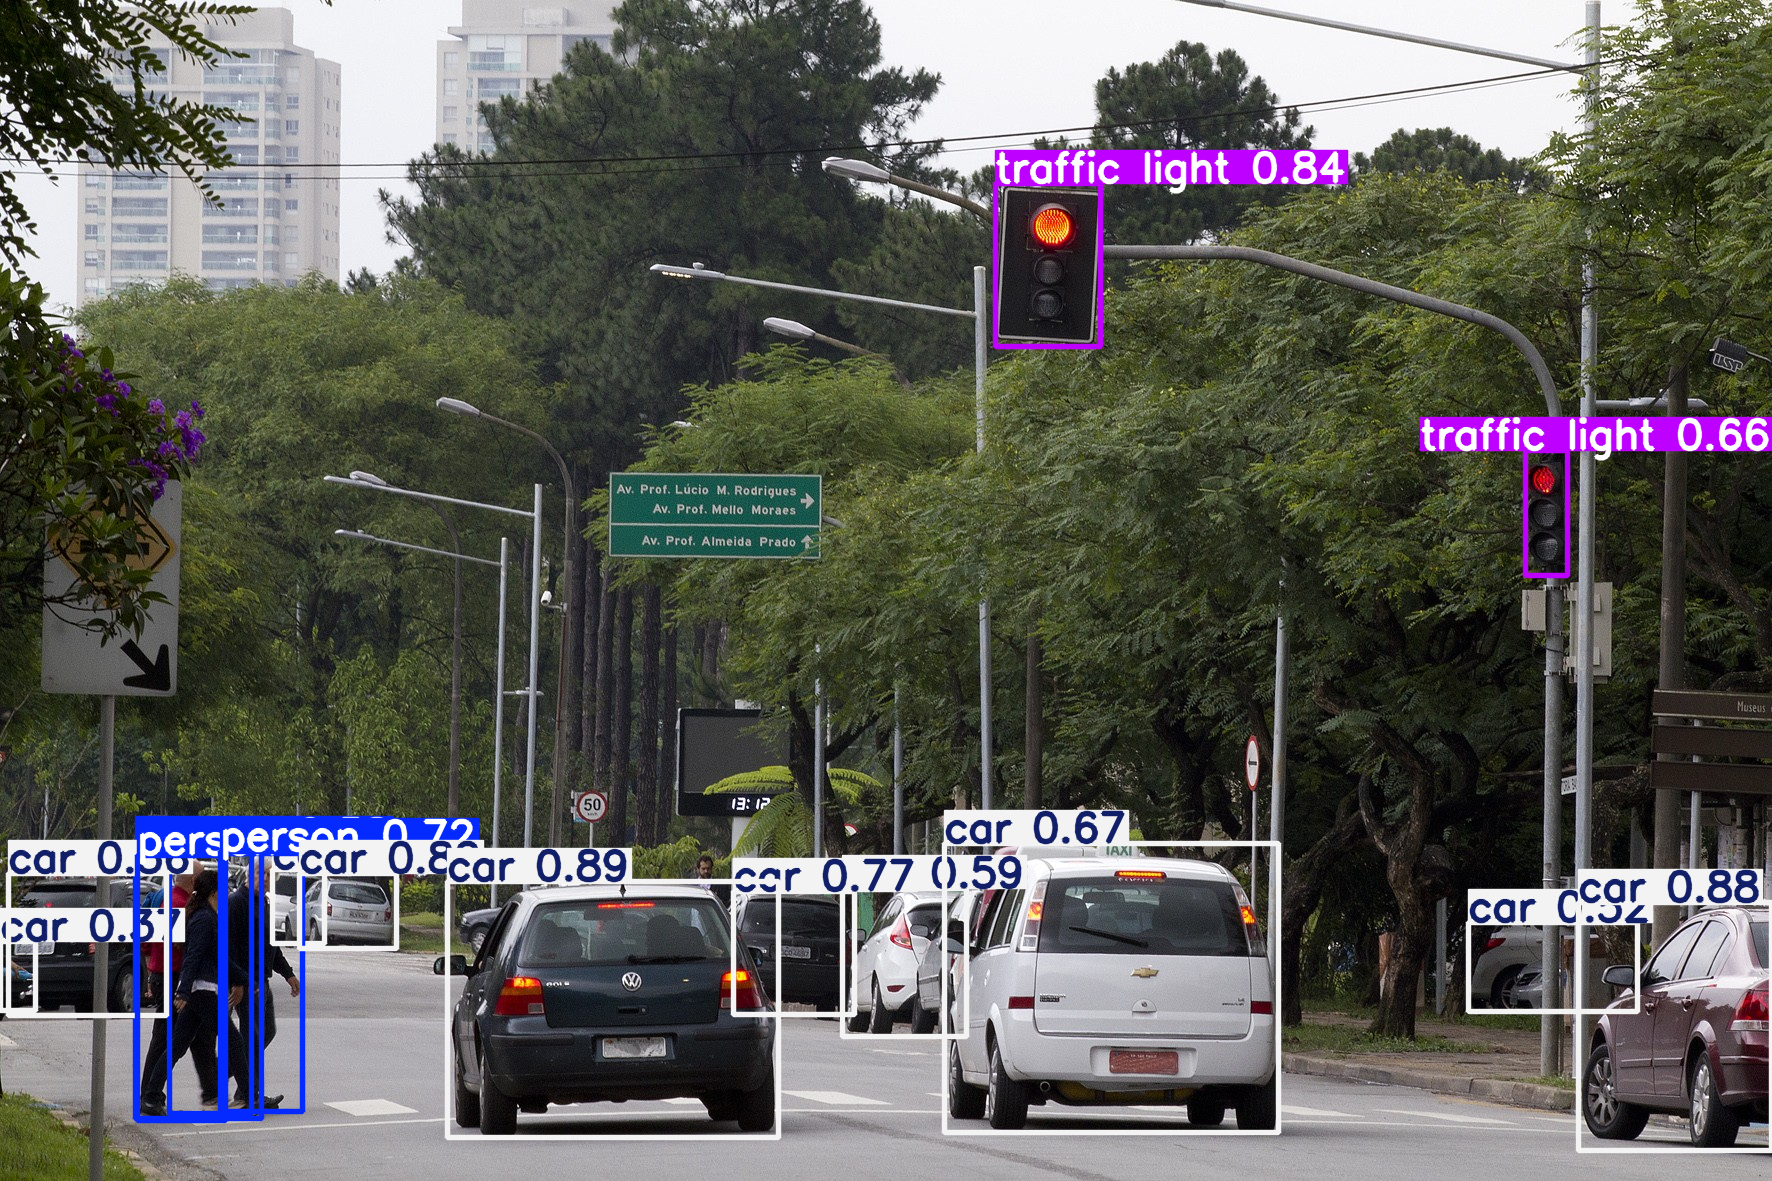

Fim da execução. Imagem salva como 'resultado_deteccao.jpg'


In [14]:
# Célula 3 (Usando imagem local) 

from PIL import Image
from IPython.display import display
from ultralytics import YOLO

# Caminho para o nosso modelo treinado
caminho_modelo_treinado = '/kaggle/working/YOLOv8-Kaggle-Project/treino_subset_coco2/weights/best.pt'

# Carrega o nosso modelo customizado
model_treinado = YOLO(caminho_modelo_treinado)

# Use o nome do arquivo que você acabou de subir
caminho_da_imagem = '/kaggle/input/pessoas-carros-semaforo' # <-- CONFIRA SE O NOME DO ARQUIVO ESTÁ CORRETO

# Roda a detecção, filtrando apenas para as classes de interesse
results = model_treinado(caminho_da_imagem, classes=[0, 2, 9])

# Exibe a imagem com os objetos detectados
print("Processando resultados...")
for r in results:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
    display(im)

# 2. Salva a imagem com resultado da detecção em um arquivo 
    nome_do_arquivo_de_saida = 'resultado_deteccao.jpg'
    im.save(nome_do_arquivo_de_saida)

print(f"Fim da execução. Imagem salva como '{nome_do_arquivo_de_saida}'")